## stitch together OmA calculations

    import deep_alg_as_fxn as daf
    daf.find_sathor(300,400,'DEEPALG_',False)
    saves everything as tiles...

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


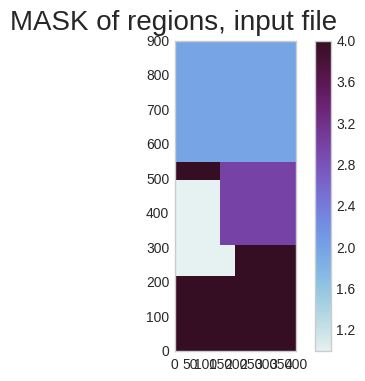

In [5]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


#### Algorithm considering deep saturated water
#### Saturation horizon is below all supersaturated water....
    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
    Saturation horizon is below all supersaturated water....

In [9]:
#open all the datasets
j0 = nc.Dataset('./BR_DEEPALG_0_100.nc')
j0_br = j0['model_output']['OmAr_HORIZON']
j1 = nc.Dataset('./BR_DEEPALG_100_200.nc')
j1_br = j1['model_output']['OmAr_HORIZON']
j2 = nc.Dataset('./BR_DEEPALG_200_300.nc')
j2_br = j2['model_output']['OmAr_HORIZON']
j3 = nc.Dataset('./BR_DEEPALG_300_400.nc')
j3_br = j3['model_output']['OmAr_HORIZON']
j4 = nc.Dataset('./BR_DEEPALG_400_500.nc')
j4_br = j4['model_output']['OmAr_HORIZON']
j5 = nc.Dataset('./BR_DEEPALG_500_600.nc')
j5_br = j5['model_output']['OmAr_HORIZON']
j6 = nc.Dataset('./BR_DEEPALG_600_700.nc')
j6_br = j6['model_output']['OmAr_HORIZON']
j7 = nc.Dataset('./BR_DEEPALG_700_800.nc')
j7_br = j7['model_output']['OmAr_HORIZON']
j8 = nc.Dataset('./BR_DEEPALG_800_898.nc')
j8_br = j8['model_output']['OmAr_HORIZON']

#
Oma_br = np.zeros([365,898,398])
Oma_br[:] = np.nan
Oma_br[:,0:100,:] = j0_br[:,0:100,:]
Oma_br[:,100:200,:] = j1_br[:,100:200,:]
Oma_br[:,200:300,:] = j2_br[:,200:300,:]
Oma_br[:,300:400,:] = j3_br[:,300:400,:]
Oma_br[:,400:500,:] = j4_br[:,400:500,:]
Oma_br[:,500:600,:] = j5_br[:,500:600,:]
Oma_br[:,600:700,:] = j6_br[:,600:700,:]
Oma_br[:,700:800,:] = j7_br[:,700:800,:]
Oma_br[:,800:898,:] = j8_br[:,800:898,:]

f = nc.Dataset('BR_OmA_horizon_DEEPALG.nc','w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
g.createDimension('days', 365)
g.createDimension('ys', 898)
g.createDimension('xs', 398)
ts2 = g.createVariable('OmAr_HORIZON','f4',('days','ys','xs'))
ts2[:] = Oma_br
f.close()

In [10]:
#open all the datasets
j0 = nc.Dataset('./PI_DEEPALG_0_100.nc')
j0_pi = j0['model_output']['OmAr_HORIZON']
j1 = nc.Dataset('./PI_DEEPALG_100_200.nc')
j1_pi = j1['model_output']['OmAr_HORIZON']
j2 = nc.Dataset('./PI_DEEPALG_200_300.nc')
j2_pi = j2['model_output']['OmAr_HORIZON']
j3 = nc.Dataset('./PI_DEEPALG_300_400.nc')
j3_pi = j3['model_output']['OmAr_HORIZON']
j4 = nc.Dataset('./PI_DEEPALG_400_500.nc')
j4_pi = j4['model_output']['OmAr_HORIZON']
j5 = nc.Dataset('./PI_DEEPALG_500_600.nc')
j5_pi = j5['model_output']['OmAr_HORIZON']
j6 = nc.Dataset('./PI_DEEPALG_600_700.nc')
j6_pi = j6['model_output']['OmAr_HORIZON']
j7 = nc.Dataset('./PI_DEEPALG_700_800.nc')
j7_pi = j7['model_output']['OmAr_HORIZON']
j8 = nc.Dataset('./PI_DEEPALG_800_898.nc')
j8_pi = j8['model_output']['OmAr_HORIZON']

#
Oma_pi = np.zeros([365,898,398])
Oma_pi[:] = np.nan
Oma_pi[:,0:100,:] = j0_pi[:,0:100,:]
Oma_pi[:,100:200,:] = j1_pi[:,100:200,:]
Oma_pi[:,200:300,:] = j2_pi[:,200:300,:]
Oma_pi[:,300:400,:] = j3_pi[:,300:400,:]
Oma_pi[:,400:500,:] = j4_pi[:,400:500,:]
Oma_pi[:,500:600,:] = j5_pi[:,500:600,:]
Oma_pi[:,600:700,:] = j6_pi[:,600:700,:]
Oma_pi[:,700:800,:] = j7_pi[:,700:800,:]
Oma_pi[:,800:898,:] = j8_pi[:,800:898,:]

f = nc.Dataset('PI_OmA_horizon_DEEPALG.nc','w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
g.createDimension('days', 365)
g.createDimension('ys', 898)
g.createDimension('xs', 398)
ts2 = g.createVariable('OmAr_HORIZON','f4',('days','ys','xs'))
ts2[:] = Oma_pi
f.close()

In [11]:
#open all the datasets
j0 = nc.Dataset('./LA_DEEPALG_0_100.nc')
j0_la = j0['model_output']['OmAr_HORIZON']
j1 = nc.Dataset('./LA_DEEPALG_100_200.nc')
j1_la = j1['model_output']['OmAr_HORIZON']
j2 = nc.Dataset('./LA_DEEPALG_200_300.nc')
j2_la = j2['model_output']['OmAr_HORIZON']
j3 = nc.Dataset('./LA_DEEPALG_300_400.nc')
j3_la = j3['model_output']['OmAr_HORIZON']
j4 = nc.Dataset('./LA_DEEPALG_400_500.nc')
j4_la = j4['model_output']['OmAr_HORIZON']
j5 = nc.Dataset('./LA_DEEPALG_500_600.nc')
j5_la = j5['model_output']['OmAr_HORIZON']
j6 = nc.Dataset('./LA_DEEPALG_600_700.nc')
j6_la = j6['model_output']['OmAr_HORIZON']
j7 = nc.Dataset('./LA_DEEPALG_700_800.nc')
j7_la = j7['model_output']['OmAr_HORIZON']
j8 = nc.Dataset('./LA_DEEPALG_800_898.nc')
j8_la = j8['model_output']['OmAr_HORIZON']

#
Oma_la = np.zeros([365,898,398])
Oma_la[:] = np.nan
Oma_la[:,0:100,:] = j0_la[:,0:100,:]
Oma_la[:,100:200,:] = j1_la[:,100:200,:]
Oma_la[:,200:300,:] = j2_la[:,200:300,:]
Oma_la[:,300:400,:] = j3_la[:,300:400,:]
Oma_la[:,400:500,:] = j4_la[:,400:500,:]
Oma_la[:,500:600,:] = j5_la[:,500:600,:]
Oma_la[:,600:700,:] = j6_la[:,600:700,:]
Oma_la[:,700:800,:] = j7_la[:,700:800,:]
Oma_la[:,800:898,:] = j8_la[:,800:898,:]

f = nc.Dataset('LA_OmA_horizon_DEEPALG.nc','w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
g.createDimension('days', 365)
g.createDimension('ys', 898)
g.createDimension('xs', 398)
ts2 = g.createVariable('OmAr_HORIZON','f4',('days','ys','xs'))
ts2[:] = Oma_la
f.close()

In [ ]:
def find_depth_deepalg(dp,prof,water_depth):
    #finds saturation horizon given a profile and corresponding depths
    first_proper_undersat = np.nan
    depth_undersat = np.nan    
    dummy_var = 0
    #print(prof)
    #print('')
    if np.ma.min(prof) >=1e19:
        dummy_var = 0
        depth_undersat = np.nan
        #print('masks all around!')
    elif np.ma.min(prof) >=1:
        depth_undersat = water_depth
        #print('saturated column')
    elif np.ma.max(prof) <1:
        depth_undersat = 0
        #print('undersat to surface')        
    else:
        t_ind = np.where(prof<1)
        t_indar = t_ind[0][0]
        t_indss = np.where(prof>=1)
        t_indsssar = t_indss[0][0]
        if t_indar.size == 0:
            dummy_var = 0
        else:
            if (t_indar.size != 0) & (t_indsssar.size == 0):
                depth_undersat = 0
                first_proper_undersat = 0
                dummy_var = 0
                #print('undersat to surface!')
                max_supsat = np.nan
            else:    
                max_supsat = np.max(t_indsssar)    
                try:
                    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
                except:
                    dummy_var = 0
                    #print("An exception occurred")
                if first_proper_undersat == 0:
                    depth_undersat = dp[0]
                elif np.isnan(first_proper_undersat):
                    dummy_var = 0
                    #print('saturated watercolumn!')
                else:
                    depth_undersat = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    return depth_undersat

def find_depth_shallowalg(dp,prof,water_depth):
    #finds saturation horizon given a profile and corresponding depths
    first_proper_undersat = np.nan
    depth_undersat = np.nan    
    dummy_var = 0
    #tot masked
    #print(prof)
    #print('')
    if np.ma.min(prof) >=1e19:
        dummy_var = 0
        depth_undersat = np.nan
        #print('masks all around!')
    elif np.ma.min(prof) >=1:
        depth_undersat = water_depth
        #print('saturated column')
    elif np.ma.max(prof) <1:
        depth_undersat = 0
        #print('undersat to surface')        
    else:
        t_ind = np.where(prof<1)
        t_indar = t_ind[0][0]
        t_indss = np.where(prof>=1)
        t_indsssar = t_indss[0][0]
        if t_indar.size == 0:
            dummy_var = 0
        else:
            if (t_indar.size != 0) & (t_indsssar.size == 0):
                depth_undersat = 0
                first_proper_undersat = 0
                dummy_var = 0
                #print('undersat to surface!')
                max_supsat = np.nan
            else:    
                max_supsat = np.max(t_indsssar)    
                try:
                    first_proper_undersat = np.min(t_indar)
                except:
                    dummy_var = 0
                    #print("An exception occurred")
                if first_proper_undersat == 0:
                    depth_undersat = dp[0]
                elif np.isnan(first_proper_undersat):
                    dummy_var = 0
                    #print('saturated watercolumn!')
                else:
                    depth_undersat = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    return depth_undersat




def find_sathor(j_st,j_en,tit,ncname,shallow):
    if shallow == False:
        print('using deep alg')
    if shallow == True:
        print('using shallow alg')
    OmA = nc.Dataset(ncname)
    BR_omA = OmA['model_output']['OmA']


    t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201812/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
    bath =  nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
    zlevels = (t_nc['deptht'][:])

    oma_d_BR = np.zeros([365,898,398])
    for day in range(0,365):
        print('ncname is ' + ncname)
        print('day is ' + str(day))
        for j in range(j_st,j_en):
            if j%20 == 0:
                print('j is ' + str(j))
            for i in range(0,398):
                
                OmA_BR_test = BR_omA[day,:,j,i]
                
                water_depth = bath.variables['Bathymetry'][j,i]
                if shallow == False:
                    oma_dep_BR = find_depth_deepalg(zlevels,OmA_BR_test,water_depth)
                    if j%20 == 0:
                        print('i is: '+str(i)+',j is: '+str(j)+',oma_depth is: '+str(oma_dep_BR))
                if shallow == True:
                    oma_dep_BR = find_depth_shallowalg(zlevels,OmA_BR_test,water_depth)
                oma_d_BR[day,j,i] = oma_dep_BR

                    
#     ncname = tit + str(j_st) + '_' + str(j_en) + '.nc'
#     f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
#     g = f.createGroup('model_output')
# #g.createDimension('days', len(3))
#     g.createDimension('days', 365)
#     g.createDimension('ys', 898)
#     g.createDimension('xs', 398)
#     ts = g.createVariable('OmAr_HORIZON','f4',('days','ys','xs'))
#     ts[:] = oma_d_BR

#     f.close()

##CALLS


tit = 'BR_DEEPALG_'
ncname = 'BR_OmA.nc'
find_sathor(j_st,j_en,tit,ncname,shallow)